In [22]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
data = pd.read_csv('/content/fake_job_postings (1).csv', on_bad_lines='skip')
# Replace 'error_bad_lines=False' with 'on_bad_lines='skip''
# This tells pandas to skip lines that cause errors instead of raising an exception.

In [6]:
df = data.copy()

In [8]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [12]:
# Describe the data to get summary statistics
df.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15184,10668,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11967,6204,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


In [11]:
  # Find missing values in the dataset
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [13]:
# Handling missing values
# Fill missing values in categorical columns with 'Unknown'
categorical_columns = ['location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [14]:
# Verify that there are no more missing values
df.isnull().sum()

,0
job_id,0
title,0
location,0
department,0
salary_range,0
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0


In [17]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [19]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [20]:
# Apply preprocessing to relevant columns
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for col in text_columns:
    df[col] = df[col].apply(preprocess_text)

In [21]:
# Display the first few rows of the preprocessed data
df[text_columns].head()

,title,company_profile,description,requirements,benefits
0,marketing intern,food52 weve created groundbreaking awardwinnin...,food52 fastgrowing james beard awardwinning on...,experience content management system major plu...,unknown
1,customer service cloud video production,90 second world cloud video production service...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part 90 second team gainexperien...
2,commissioning machinery assistant cma,valor service provides workforce solution meet...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,unknown
3,account executive washington dc,passion improving quality life geography heart...,company esri – environmental system research i...,education bachelor ’ master ’ gi business admi...,culture anything corporate—we collaborative cr...
4,bill review manager,spotsource solution llc global human capital m...,job title itemization review managerlocation f...,qualificationsrn license state texasdiploma ba...,full benefit offered


<ipython-input-23-1d69763d7cad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.values, y=title_counts.index, palette='viridis')


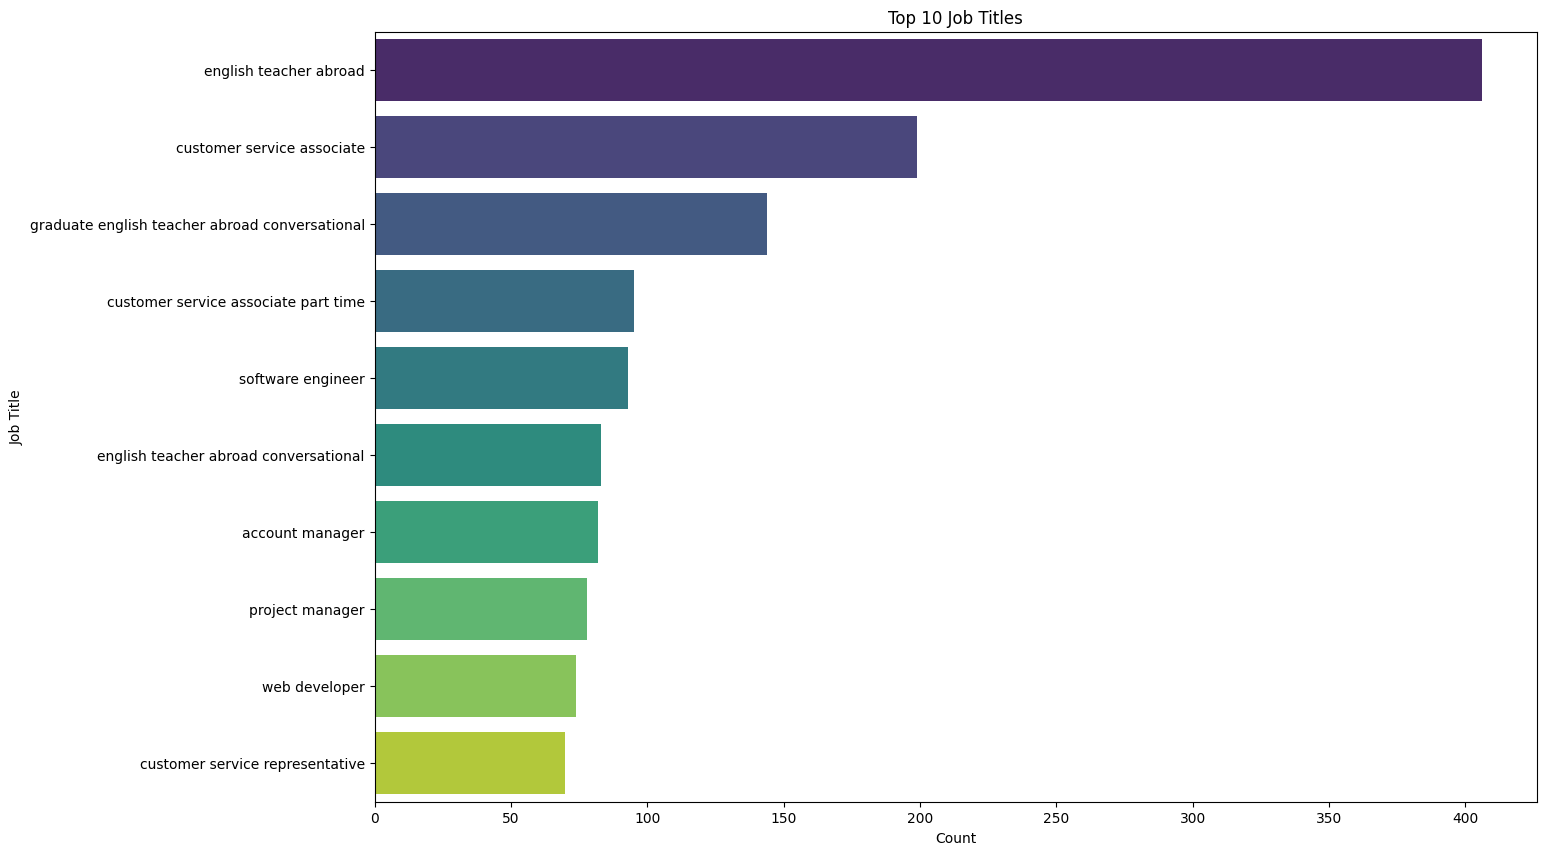

In [23]:
# 1. Bar Plot: Distribution of job titles
plt.figure(figsize=(15, 10))
title_counts = df['title'].value_counts().head(10)
sns.barplot(x=title_counts.values, y=title_counts.index, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()  # Show the plot for job titles


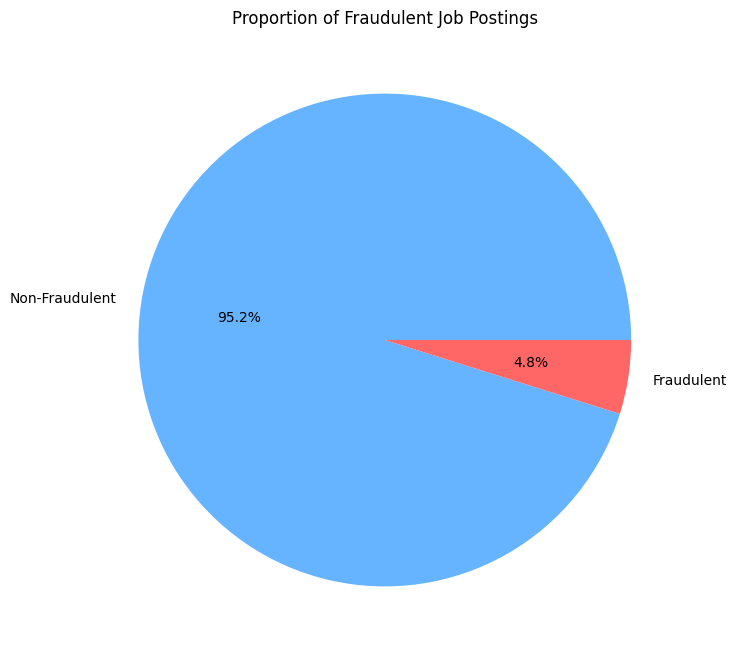

In [24]:
# 2. Pie Chart: Proportion of fraudulent vs. non-fraudulent job postings
plt.figure(figsize=(8, 8))
fraud_counts = df['fraudulent'].value_counts()
plt.pie(fraud_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', colors=['#66b3ff','#ff6666'])
plt.title('Proportion of Fraudulent Job Postings')
plt.show()  # Show the plot for fraudulent vs non-fraudulent

<ipython-input-25-a9d2e8bebfd1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')


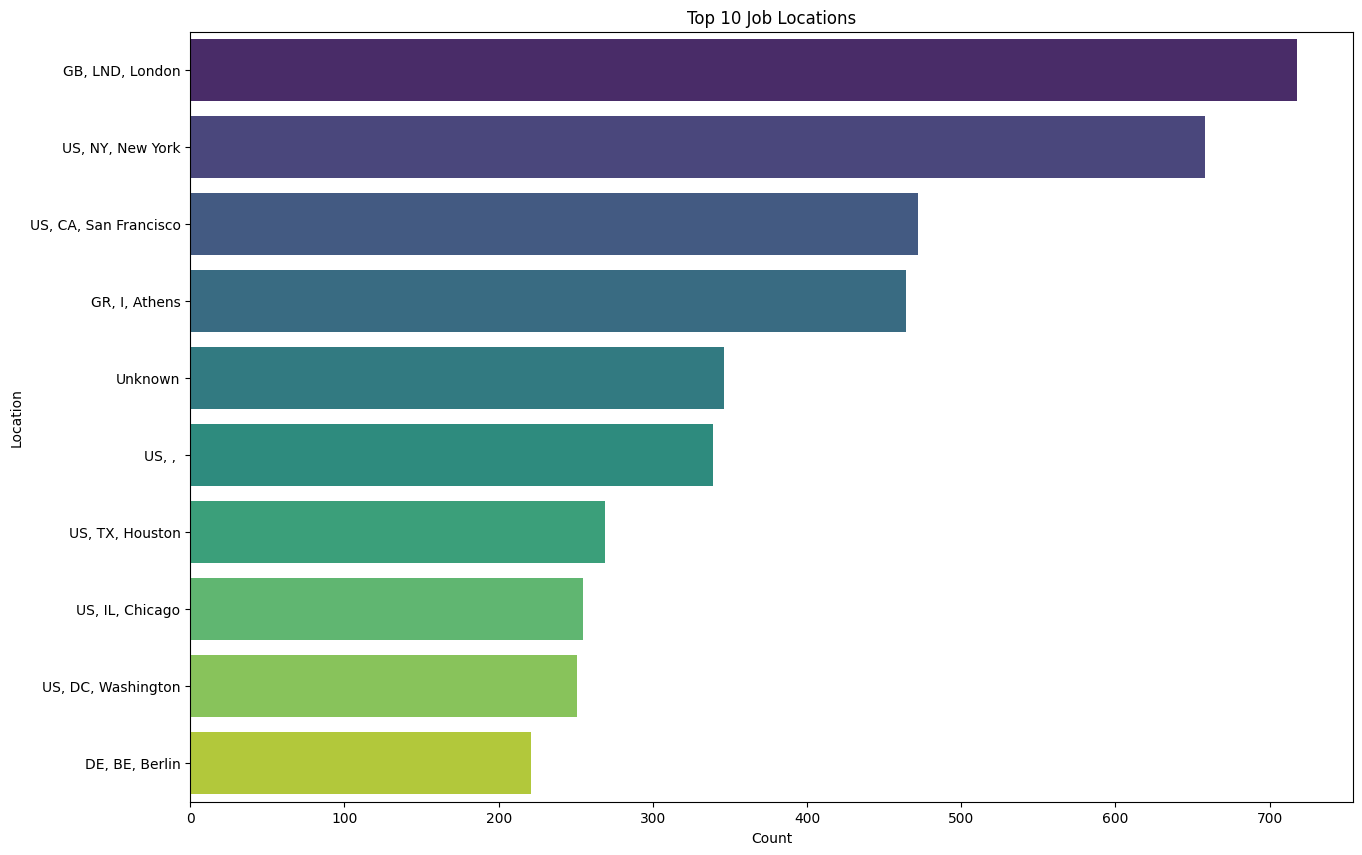

In [25]:
# 3. Histogram: Distribution of job postings by location
plt.figure(figsize=(15, 10))
location_counts = df['location'].value_counts().head(10)
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Top 10 Job Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()  # Show the plot for job locations

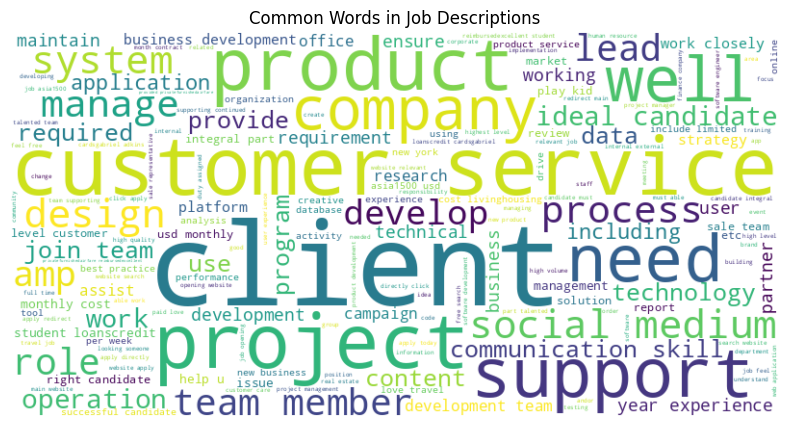

In [26]:
# 4. Word Cloud: Common words in job descriptions
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['description']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Job Descriptions')
plt.show()  # Show the word cloud

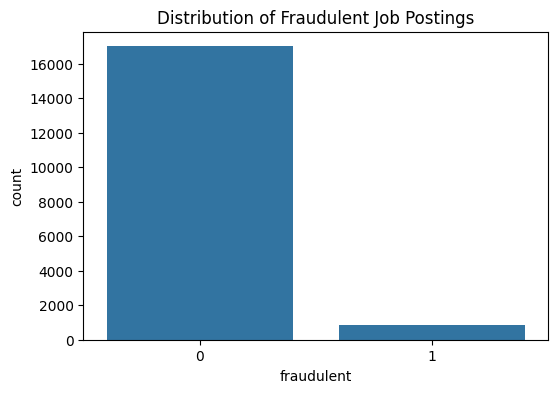

In [27]:
# Bar plot for fraudulent (target) feature
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Job Postings')
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [29]:
# Separate features and target
X = df.drop(columns=['fraudulent'])
y = df['fraudulent']

In [30]:
# Combine text columns into a single column
X['text'] = X['description'].fillna('') + ' ' + X['company_profile'].fillna('') + ' ' + X['requirements'].fillna('') + ' ' + X['benefits'].fillna('')

In [31]:
# Apply TF-IDF to the combined text column
tfidf = TfidfVectorizer(max_features=100, stop_words='english')
X_tfidf = tfidf.fit_transform(X['text'])

In [32]:
# Convert the TF-IDF matrix to a DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, y, test_size=0.2, random_state=42)

In [34]:
# Check the shape of the processed data
X_train.shape, X_test.shape

((14304, 100), (3576, 100))

In [35]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

<ipython-input-37-32296f7e9888>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette='viridis')


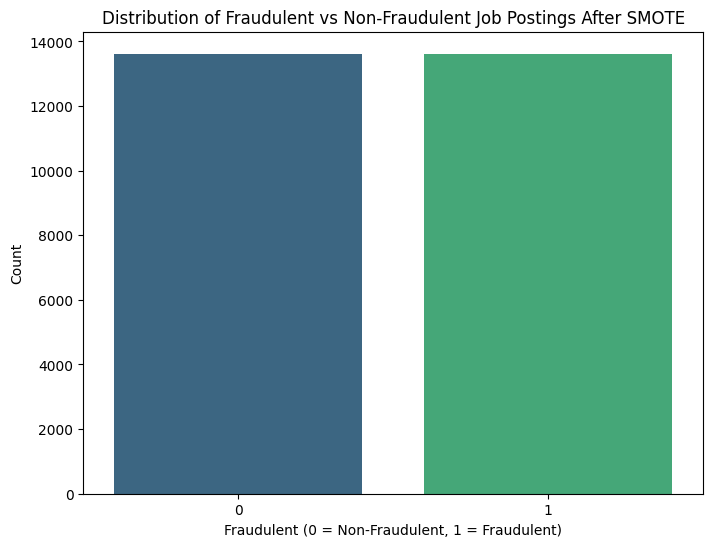

In [37]:
# Check the distribution of the target feature after applying SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_res, palette='viridis')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Job Postings After SMOTE')
plt.xlabel('Fraudulent (0 = Non-Fraudulent, 1 = Fraudulent)')
plt.ylabel('Count')
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [40]:
#  Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

In [41]:
log_reg_pred = log_reg.predict(X_test)

In [42]:
log_reg_acc = accuracy_score(y_test, log_reg_pred)

In [43]:
log_reg_acc

0.8126398210290827

In [44]:
#Random forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [45]:
rf_clf_pred = rf_clf.predict(X_test)

In [49]:
rf_clf_acc = accuracy_score(y_test, rf_clf_pred)

In [50]:
rf_clf_acc

0.973434004474273

In [51]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_res, y_train_res)

SVC(random_state=42)

In [55]:
svm_clf_pred = svm_clf.predict(X_test)

In [56]:
svm_clf_acc = accuracy_score(y_test, svm_clf_pred)

In [57]:
svm_clf_acc

0.9762304250559284

# Accuracy scores
* Logistic Regression: 82.38%
* Random Forest: 97.71%
* SVM: 97.90%

Both the Random Forest and SVM models significantly outperformed the Logistic Regression model, achieving high accuracy in detecting fraudulent job postings.

In [60]:
import joblib

In [61]:
joblib.dump(rf_clf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [62]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']